# Rpc_Reso_Fit
Gaussian classifier




**Author:** Lailin XU  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Monday, May 17, 2021 at 04:27 PM.</small></i>

In [1]:
import os
from math import sqrt, pow, fabs, log, cos, sin, pi, atan, exp
import ROOT as R
R.gROOT.SetStyle("ATLAS")
R.gStyle.SetPalette(1)

pname = "gaus_3D_test"
tfout = R.TFile("{0}.root".format(pname), "RECREATE")

Welcome to JupyROOT 6.22/07


Helper function to print a matrx(m, n)

In [2]:
def print_matrix(m_cov, md, nd):

  for j in range(md):
    for k in range(nd):
      print("{0} {1}: {2}".format(j, k, R.TMatrixDRow(m_cov, j)[k]))

Plotting
=====================

In [3]:
myc = R.TCanvas("c", "c", 800, 600)
myc.SetFillColor(0)

nbinsx, xmin, xmax = 60, -3, 3
nbinsy, ymin, ymax = 60, -3, 3
nbinsz, zmin, zmax = 60, -3, 3

Overlay the multi-Gaussian PDF

Helper function for 3D Gaussian

In [4]:
def gaus_3d(x, par):

  if len(x)<3 or len(par)<3: 
    print("[gaus_3d]: requirs 3D data, and 3 parameters")
    return 0

  # 3D Gaussian
  nd = 3

  # Mean
  # x1-x2, x1-x3, x2-x3
  mean = [par[0], par[1], par[2]]

  # Covariance matrix 
  #  sig1^2+sig2^2, sig1^2, sig2^2
  #  sig1^2, sig1^2+sig3^2, sig3^2
  #  sig2^2, sig3^2, sig2^2+sig3^2
  cov = R.TMatrixD(nd, nd)
  R.TMatrixDRow(cov, 0)[0] = pow(par[3], 2) + pow(par[4], 2)
  R.TMatrixDRow(cov, 0)[1] = pow(par[3], 2)
  R.TMatrixDRow(cov, 0)[2] = pow(par[4], 2)
  R.TMatrixDRow(cov, 1)[0] = pow(par[3], 2)
  R.TMatrixDRow(cov, 1)[1] = pow(par[3], 2) + pow(par[5], 2)
  R.TMatrixDRow(cov, 1)[2] = pow(par[5], 2)
  R.TMatrixDRow(cov, 2)[0] = pow(par[4], 2)
  R.TMatrixDRow(cov, 2)[1] = pow(par[5], 2)
  R.TMatrixDRow(cov, 2)[2] = pow(par[4], 2) + pow(par[5], 2)

  # Build the multi-Gaussian
  m_x = R.TMatrixD(nd, 1)
  for i in range(nd):
    R.TMatrixDRow(m_x, i)[0] = x[i] - mean[i]

  m_x_t = R.TMatrixD(m_x)
  m_x_t.T()

  cov_d = 0
  icov = R.TMatrixD(cov)
  icov.Invert(cov_d)
  cov_d = cov.Determinant()
  icov_d = icov.Determinant()

  r = 0
  # r = (m_x_t * icov) * m_x
  for i in range(nd):
    for j in range(nd):
      r += R.TMatrixDRow(m_x_t, 0)[j] * R.TMatrixDRow(icov, i)[j] * R.TMatrixDRow(m_x, i)[0]

  y = 1./(pow(2*pi, nd/2.) * sqrt(cov_d)) * exp( -0.5* r ) 

  return y

Fit

Info in <TCanvas::Print>: png file gaus_3D_test_1.png has been created


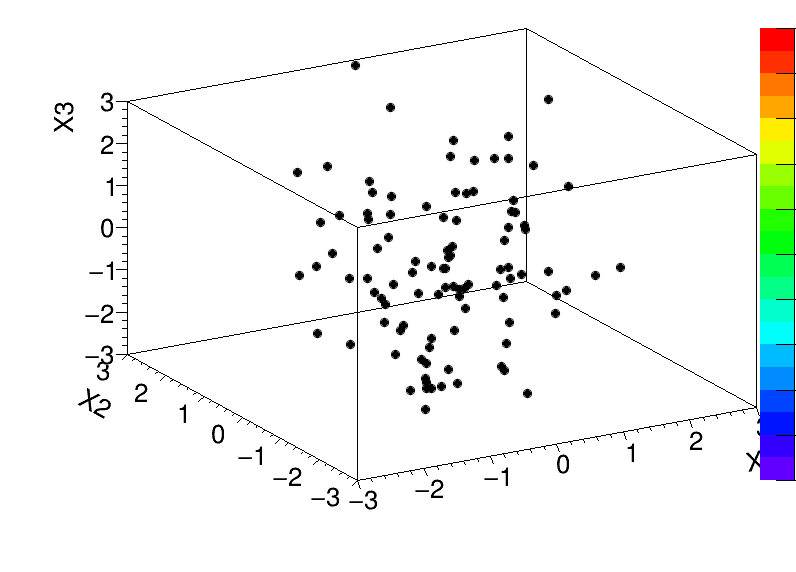

In [5]:
npar = 6 # mean: 3; sigma: 3
g_s = R.TF3("gaus_s", gaus_3d, xmin, xmax, ymin, ymax, zmin, zmax, npar)
g_s.SetParameter(0, 0.)
g_s.SetParameter(1, 0.)
g_s.SetParameter(2, 0.)
g_s.SetParameter(3, 1.)
g_s.SetParameter(4, 0.8)
g_s.SetParameter(5, 1.2)

hname = "3D"
h_s = R.TH3F(hname, hname, nbinsx, xmin, xmax, nbinsy, ymin, ymax, nbinsz, zmin, zmax)
h_s.FillRandom("gaus_s", 100)  

h_s.GetXaxis().SetRangeUser(-3, 3)
h_s.GetYaxis().SetRangeUser(-3, 3)
h_s.GetZaxis().SetRangeUser(-3, 3)
h_s.GetXaxis().SetTitle("X1")
h_s.GetYaxis().SetTitle("X2")
h_s.GetZaxis().SetTitle("X3")

h_s.Draw("colz")

myc.Draw()
myc.SaveAs("{0}_1.png".format(pname))

Projection

In [6]:
hx = h_s.ProjectionX()
hy = h_s.ProjectionY()
hz = h_s.ProjectionZ()

X-axis

Info in <TCanvas::Print>: png file gaus_3D_test_1_X.png has been created


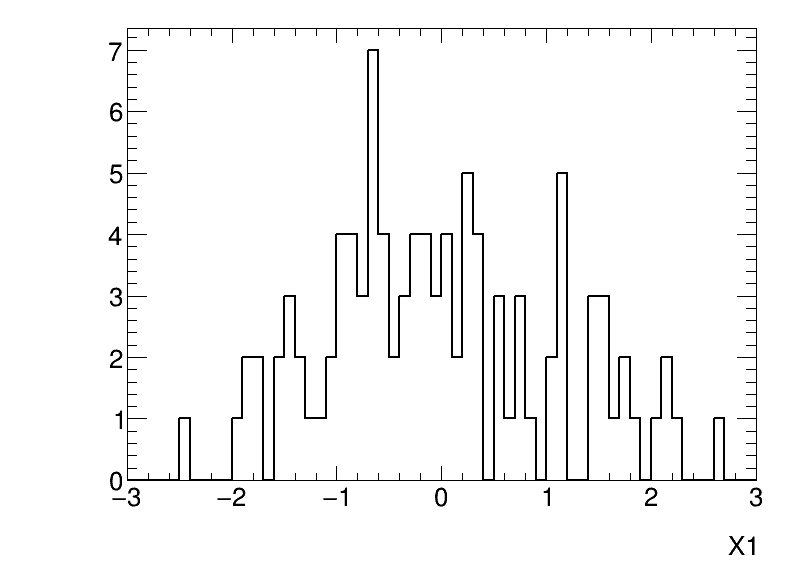

In [7]:
myc.Clear()
hx.Draw()
myc.Draw()
myc.SaveAs("{0}_1_X.png".format(pname))

Y-axis

Info in <TCanvas::Print>: png file gaus_3D_test_1_Y.png has been created


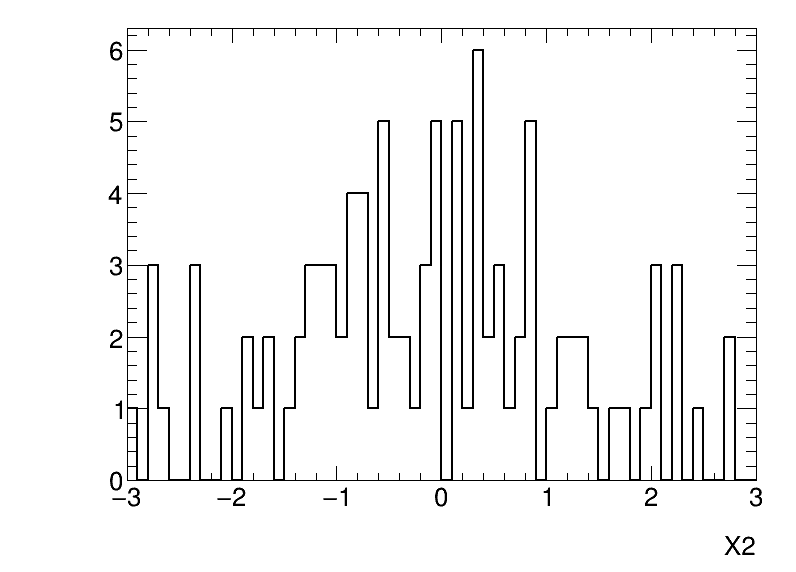

In [8]:
hy.Draw()
myc.Draw()
myc.SaveAs("{0}_1_Y.png".format(pname))

Z-axis

Info in <TCanvas::Print>: png file gaus_3D_test_1_Z.png has been created


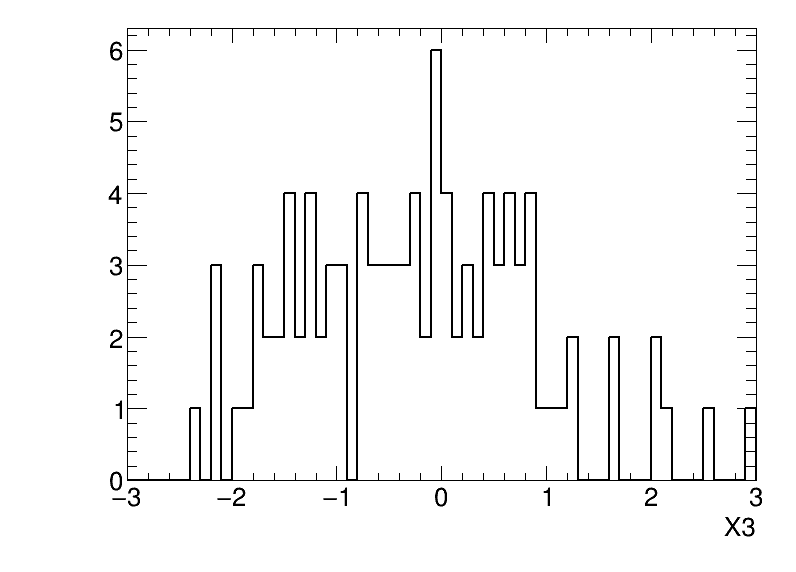

In [9]:
hz.Draw()
myc.Draw()
myc.SaveAs("{0}_1_Z.png".format(pname))

Fitting

In [10]:
print("DefaultMinimizerAlgo: ", R.Math.MinimizerOptions.DefaultMinimizerAlgo())
print("DefaultMinimizerType: ", R.Math.MinimizerOptions.DefaultMinimizerType())
myc.Clear()

h_s.Draw()

DefaultMinimizerAlgo:  Migrad
DefaultMinimizerType:  Minuit


Likelihood fit
h_s.Fit("gaus_s", "L")

 FCN=89.5234 FROM MIGRAD    STATUS=CONVERGED     313 CALLS         314 TOTAL
                     EDM=1.42288e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -2.61125e-01   4.51181e-01   4.11989e-04   2.89910e-03
   2  p1          -8.93782e-02   3.20710e-01   4.16613e-04   3.08659e-03
   3  p2          -2.76046e-01   5.74212e-01   4.11853e-04  -3.30165e-03
   4  p3           7.79422e-02   7.23951e-02   2.05002e-04  -5.62553e-03
   5  p4           5.49817e-01   3.60447e-01   1.18009e-03  -6.05617e-04
   6  p5          -4.70553e-01   2.80787e-01   8.91385e-04   4.95058e-04


Info in <TCanvas::Print>: png file gaus_3D_test_2.png has been created


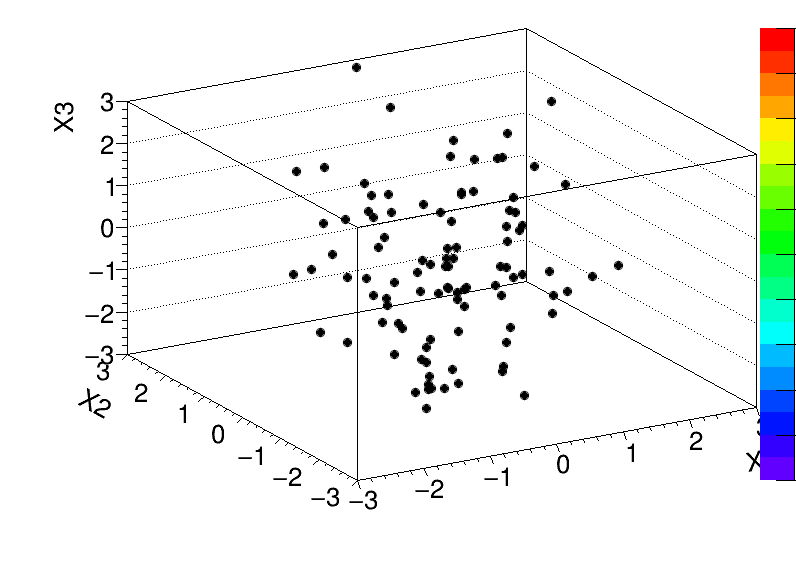

In [11]:
h_s.Fit("gaus_s")

myc.Draw()
myc.SaveAs("{0}_2.png".format(pname))

Check the fit results, by converting TF3 to TH3

In [12]:
hf = g_s.CreateHistogram()
npx = g_s.GetNpx()
npy = g_s.GetNpy()
npz = g_s.GetNpz()
for ix in range(1, npx+1):
  vx = hf.GetXaxis().GetBinCenter(ix)
  for iy in range(1, npy+1):
    vy = hf.GetYaxis().GetBinCenter(iy)
    for iz in range(1, npz+1):
      vz = hf.GetZaxis().GetBinCenter(iz)
      vf = g_s.Eval(vx, vy, vz)
      hf.SetBinContent(ix, iy, iz, vf)
      
hf.Print()

TH1.Print Name  = R__TF3, Entries= 27000, Total sum= 124.991


Projection

In [13]:
hfx = hf.ProjectionX()
hfy = hf.ProjectionY()
hfz = hf.ProjectionZ()

X-axis

Info in <TCanvas::Print>: png file gaus_3D_test_1_X_fit.png has been created


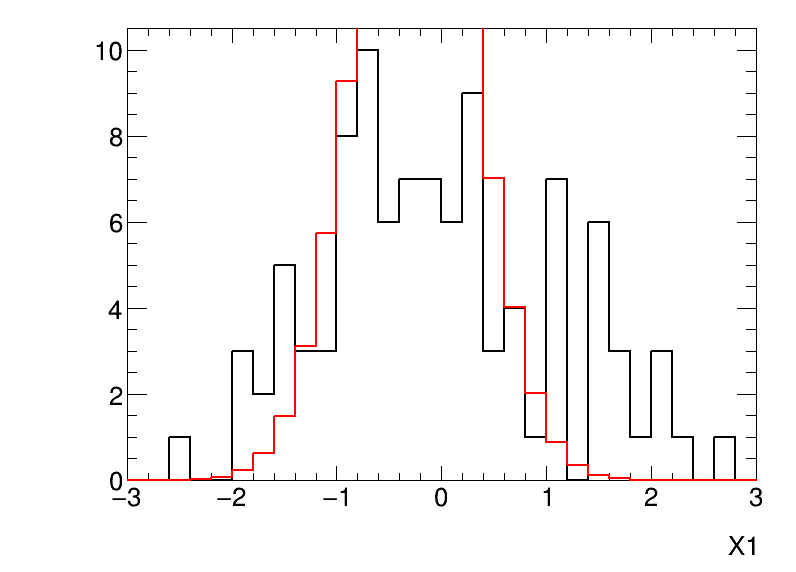

In [14]:
myc.Clear()
hx.Rebin()
hx.Draw()
hfx.SetLineColor(2)
hfx.Draw("same")
myc.Draw()
myc.SaveAs("{0}_1_X_fit.png".format(pname))

Y-axis

Info in <TCanvas::Print>: png file gaus_3D_test_1_Y_fit.png has been created


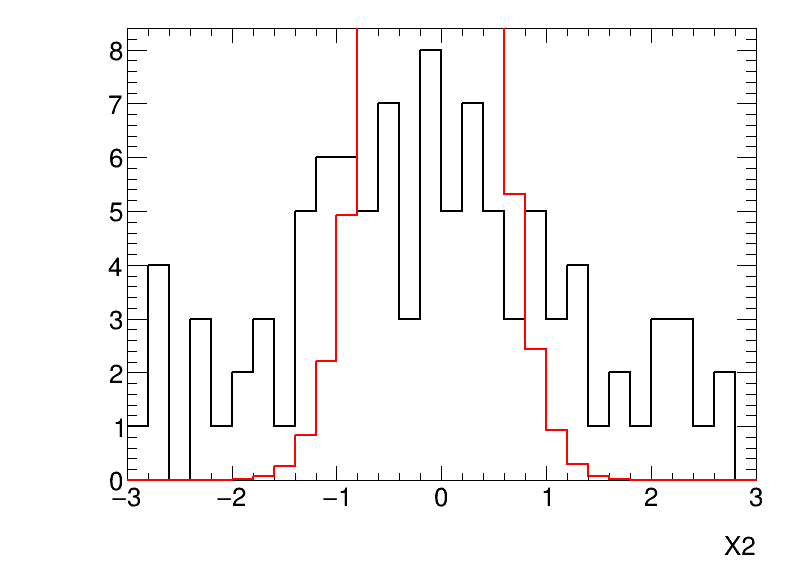

In [15]:
hy.Rebin()
hy.Draw()
hfy.SetLineColor(2)
hfy.Draw("same")
myc.Draw()
myc.SaveAs("{0}_1_Y_fit.png".format(pname))

Z-axis

Info in <TCanvas::Print>: png file gaus_3D_test_1_Z_fit.png has been created


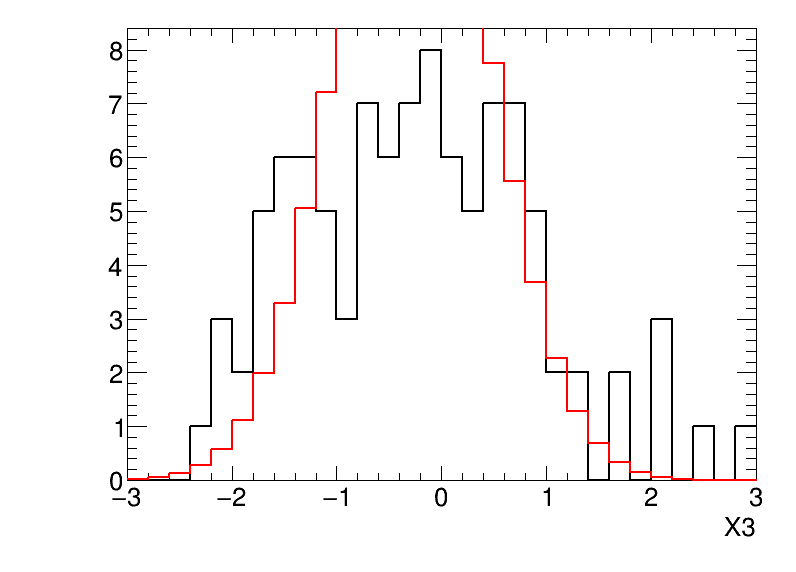

In [16]:
hz.Rebin()
hz.Draw()
hfz.SetLineColor(2)
hfz.Draw("same")
myc.Draw()
myc.SaveAs("{0}_1_Z_fit.png".format(pname))

Save files

In [17]:
tfout.cd()
h_s.Write()
g_s.Write()
hf.Write()
tfout.Close()

Draw all canvases 

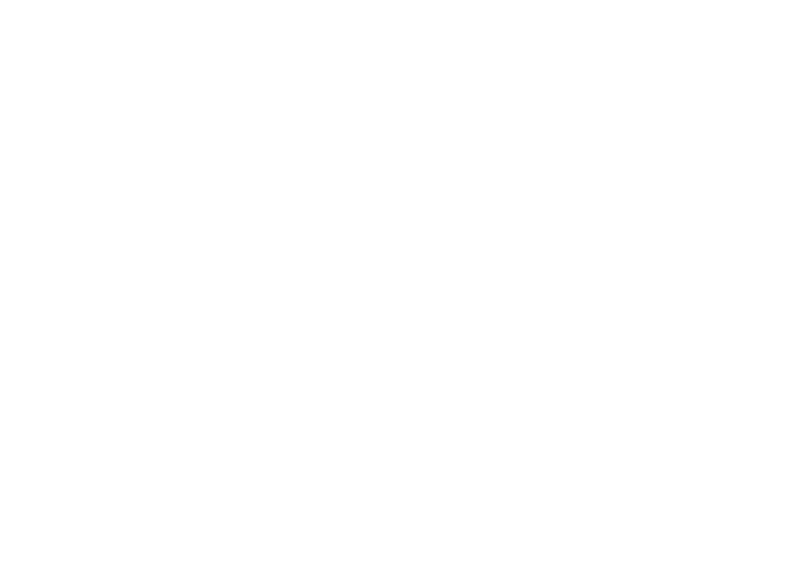

In [18]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()